In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [18]:
df = pd.read_csv('data/stud.csv')


In [19]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
X=df.drop(columns=['math_score'],axis=1)

In [21]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [22]:
print("Categories  in 'gender' variable:  " , end= "")
print(df['gender'].unique())

print("Categories  in 'race_ethnicity' variable:  " , end= "")
print(df['race_ethnicity'].unique())

print("Categories  in 'parental_level_of_education' variable:  " , end= "")
print(df['parental_level_of_education'].unique())


print("Categories  in 'lunch' variable:  " , end= "")
print(df['lunch'].unique())

print("Categories  in 'test_preparation_course	' variable:  " , end= "")
print(df['test_preparation_course'].unique())

Categories  in 'gender' variable:  ['female' 'male']
Categories  in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories  in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories  in 'lunch' variable:  ['standard' 'free/reduced']
Categories  in 'test_preparation_course	' variable:  ['none' 'completed']


In [23]:
y=df['math_score']

In [24]:

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [25]:
X = preprocessor.fit_transform(X)


In [26]:
X.shape


(1000, 19)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [34]:
# Evaluate Model
def evaluate_model(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    rmse=np.sqrt(mean_squared_error(true,predict))
    r2_square=r2_score(true,predict)
    
    
    return r2_square,mae,rmse

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.2626
- Mean Absolute Error: 0.8742
- R2 Score: 5.3250
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.2161
- Mean Absolute Error: 0.8808
- R2 Score: 5.3847


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.2063
- Mean Absolute Error: 0.8071
- R2 Score: 6.5938
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1579
- Mean Absolute Error: 0.8253
- R2 Score: 6.5197


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.2650
- Mean Absolute Error: 0.8743
- R2 Score: 5.3233
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.2111
- Mean Absolute Error: 0.8806
- R2 Score: 5.3904


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.5137
- Mean Absolute Error: 0.8556
- R2 Score: 5.7066
-----------------------

In [37]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
4,Decision Tree,8.027141
3,K-Neighbors Regressor,7.253041
1,Lasso,6.519695
6,XGBRegressor,6.473307
8,AdaBoost Regressor,6.119626
7,CatBoosting Regressor,6.008632
5,Random Forest Regressor,5.999082
2,Ridge,5.390387
0,Linear Regression,5.384706


In [38]:
# Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model  is %.2f" %score) 

Accuracy of the model  is 88.08


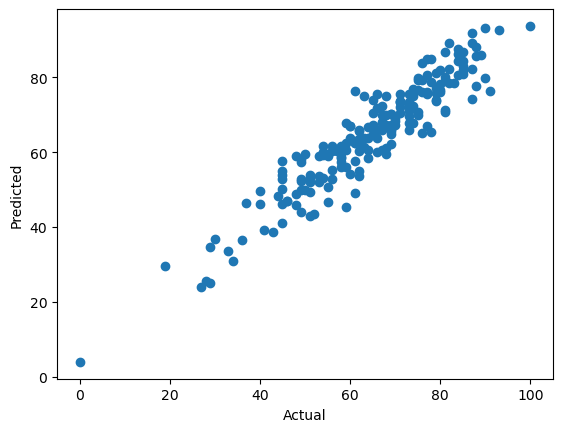

In [39]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

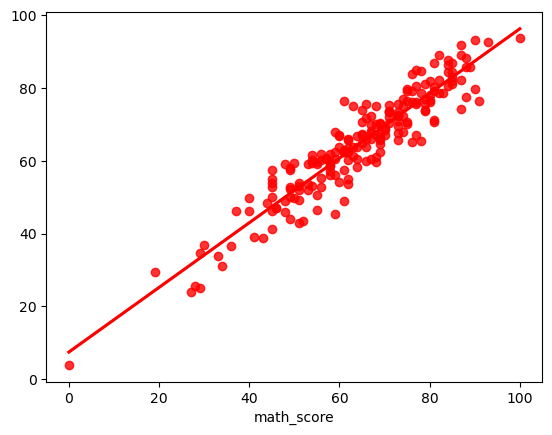

In [40]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [43]:
pred_df=pd.DataFrame({'Actual':y_test, 'predicted':y_pred,'Different':y_test-y_pred})
pred_df

,Actual,predicted,Different
521,91,76.46875,14.53125
737,53,59.00000,-6.00000
740,80,76.65625,3.34375
660,74,76.87500,-2.87500
411,84,87.65625,-3.65625
...,...,...,...
408,52,43.59375,8.40625
332,62,62.31250,-0.31250
208,74,67.93750,6.06250
613,65,67.09375,-2.09375
